Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Loading the Dataset

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

First 5 rows of the Dataset

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Last 5 rows of the dataset

In [ ]:
#last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Information of the dataset

In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking if there is any missing values in any column

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
credit_card_data.shape

(284807, 31)

removing the duplicates

In [ ]:
credit_card_data.drop_duplicates(inplace=True)

In [ ]:
credit_card_data.shape

(283726, 31)

there are 1081 duplicate transactions

Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

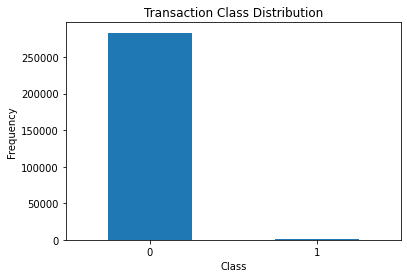

In [ ]:
count_classes = pd.value_counts(credit_card_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

Fraudulent transactions is very less compared to normal transactions

Total count of legit and fraudulent transactions

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

Separating legit and fraudulent transactions

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

Size of legit and fraud transactions

In [ ]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


Describing the legit and fraud transactions

In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Here we see that the mean of normal transactions is very less than the mean of fraudulent transactions

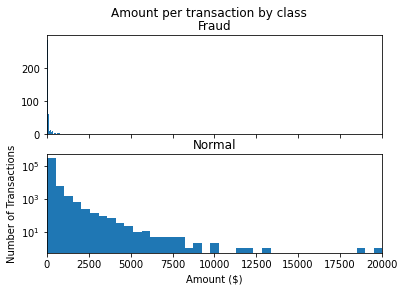

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

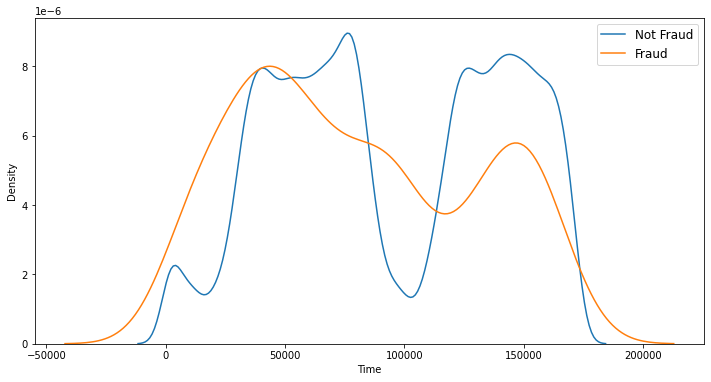

In [ ]:
#Time
plt.figure(figsize = [12,6])
sns.kdeplot(credit_card_data[credit_card_data.Class == 0].Time, label = 'Not Fraud')
sns.kdeplot(credit_card_data[credit_card_data.Class == 1].Time, label = 'Fraud')
plt.legend(fontsize = 12)

Fraudulent transaction are more evenly distributed than non-fraudulent ones. It looks like fraudulent transactions were relatively lesser at higher time(the seconds elapsed between each transaction and the first transaction).

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


Data Preprocessing

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=473)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

dropping the Time variable 

In [ ]:
new_dataset.drop(['Time'], axis=1,inplace=True)

amount variable has been standardized

In [ ]:
sc = StandardScaler()

amt = new_dataset['Amount'].values

new_dataset['Amount'] = sc.fit_transform(amt.reshape(-1,1))

new_dataset['Amount']

156404   -0.416625
11033    -0.434716
103960    0.472422
130149    0.198698
115875    0.307290
            ...   
279863    1.285859
280143   -0.444317
280149   -0.101473
281144    0.641332
281674   -0.258649
Name: Amount, Length: 946, dtype: float64

shape of new dataset

In [ ]:
new_dataset.shape

(946, 30)

First 5 rows of new dataset

In [ ]:
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
156404,-1.151333,0.322878,1.038714,-0.003855,1.738847,-1.387503,0.643190,-0.362367,1.251486,-1.760577,...,-0.172023,-0.163055,-0.477221,-0.164528,0.872169,0.696942,-0.239694,-0.143585,-0.416625,0
11033,-7.706729,-7.523971,3.116820,5.374209,4.042394,-1.729064,-1.362790,0.136208,1.731317,0.551059,...,-0.793218,0.598356,5.719455,0.204727,1.951254,0.166192,-0.224555,0.824985,-0.434716,0
103960,0.914275,-1.460798,0.794404,-0.583088,-1.367189,0.566844,-1.045039,0.237758,-0.430135,0.527870,...,0.489875,1.063417,-0.305639,-0.220633,0.341102,-0.036748,0.027924,0.044036,0.472422,0
130149,1.140912,-1.819880,-0.135257,-2.886458,-1.007317,0.925480,-1.103557,0.340378,1.621752,-0.855341,...,-0.479572,-0.838994,-0.277336,-1.725873,0.543536,-0.729343,0.113731,0.027698,0.198698,0
115875,-1.268131,-1.081146,1.111890,-2.328581,0.679979,-0.702841,0.795815,-0.246594,-1.529331,0.001356,...,-0.190269,-0.546217,0.209166,-0.501162,0.146828,0.716387,-0.271421,-0.125812,0.307290,0


Last 5 rows of new dataset

In [ ]:
new_dataset.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.285859,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.444317,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.101473,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.641332,1
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.258649,1


Count of legit and fraudulent in new dataset

In [ ]:
new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.130963,0.051372,0.063295,0.052011,-0.089431,-0.031637,0.003282,0.007167,-0.073777,0.021187,...,-0.049423,-0.004398,-0.022611,0.012737,-0.031701,-0.000483,0.052948,-0.006369,-0.008183,-0.102917
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.102917


Splitting the data into Features & Targets


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
156404 -1.151333  0.322878  1.038714 -0.003855  1.738847 -1.387503  0.643190   
11033  -7.706729 -7.523971  3.116820  5.374209  4.042394 -1.729064 -1.362790   
103960  0.914275 -1.460798  0.794404 -0.583088 -1.367189  0.566844 -1.045039   
130149  1.140912 -1.819880 -0.135257 -2.886458 -1.007317  0.925480 -1.103557   
115875 -1.268131 -1.081146  1.111890 -2.328581  0.679979 -0.702841  0.795815   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

In [ ]:
print(Y)

156404    0
11033     0
103960    0
130149    0
115875    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

Size of X, X_train and X_test after splitting the data

In [ ]:
  print(X.shape, X_train.shape, X_test.shape)

(946, 29) (756, 29) (190, 29)


Defining Evaluation criteria function

In [ ]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score


In [ ]:
def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score*100}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
#   save scores into dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent','Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=9)
    plt.show()

In [ ]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()

Model Training

Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
pred1 = lr_model.predict(X_test)
prob1 = lr_model.predict_proba(X_test)

Logistic Regression
--------------------------------------------------------------------------
accuracy score :94.21052631578948
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        95
           1       0.96      0.93      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



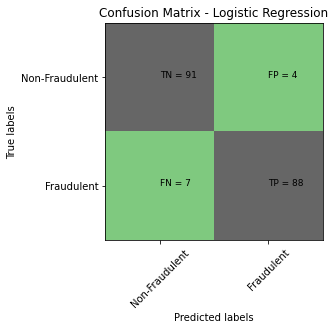

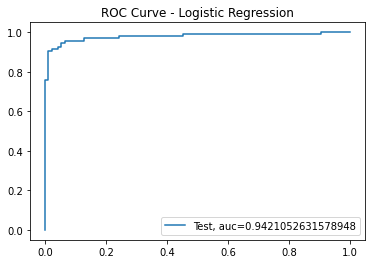

In [ ]:
print_results("Logistic Regression", Y_test, pred1,prob1[:,-1])

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.942105,0.956522,0.926316,0.941176


Random Forest Classifier

Random Forest Classifier
--------------------------------------------------------------------------
accuracy score :92.63157894736842
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.96      0.89      0.92        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



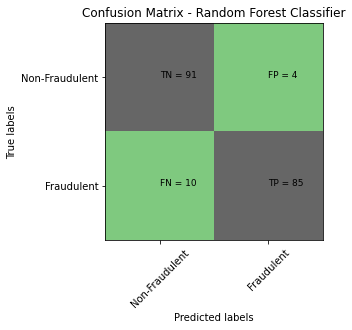

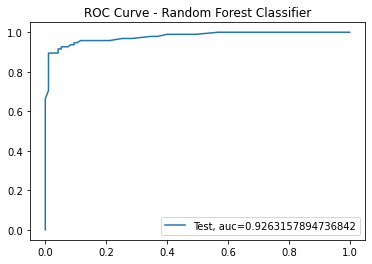

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,Y_train)
pred2 = rfc_model.predict(X_test)
prob2 = rfc_model.predict_proba(X_test)
print_results("Random Forest Classifier", Y_test, pred2,prob2[:,-1])

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.942105,0.956522,0.926316,0.941176
1,Random Forest Classifier,0.926316,0.955056,0.894737,0.923913


KNN classifier

KNN Classifier
--------------------------------------------------------------------------
accuracy score :93.15789473684211
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.96      0.91      0.93        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



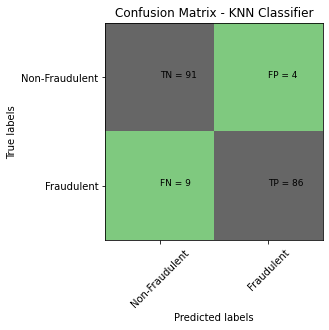

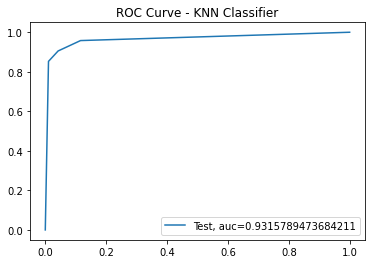

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=16)
knn.fit(X_train,Y_train)
pred4 = knn.predict(X_test)
prob4 = knn.predict_proba(X_test)
print_results("KNN Classifier", Y_test, pred4,prob4[:,-1])

In [ ]:
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.942105,0.956522,0.926316,0.941176
1,Random Forest Classifier,0.926316,0.955056,0.894737,0.923913
2,KNN Classifier,0.931579,0.955556,0.905263,0.929730


Over sampling --> Smote

Amount feature is varying, so standardizing it  

In [ ]:
sc = StandardScaler()

amt = credit_card_data['Amount'].values

credit_card_data['Amount'] = sc.fit_transform(amt.reshape(-1,1))

credit_card_data['Amount']

0         0.244200
1        -0.342584
2         1.158900
3         0.139886
4        -0.073813
            ...   
284802   -0.350252
284803   -0.254325
284804   -0.082239
284805   -0.313391
284806    0.513290
Name: Amount, Length: 283726, dtype: float64

Time feature is an external factor, so dropping it 

In [ ]:
credit_card_data.drop(['Time'], axis=1,inplace=True)

shape of new dataset

In [ ]:
credit_card_data.shape

(283726, 30)

In [ ]:
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']

AFTER SMOTE


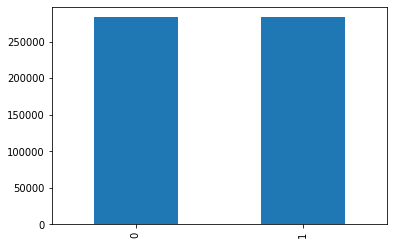

In [ ]:
# implement smote now
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X,Y  = smote.fit_resample(X, Y)

print("AFTER SMOTE")
Y.value_counts().plot.bar()

In [ ]:
# distribution of legit transactions & fraudulent transactions
Y.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

Splitting of dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

Defining evaluation criteria function

In [ ]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df1 = pd.DataFrame(columns=columns)
evaluation_df1

,Model,accuracy score,Precision,Recall,f1_score


In [ ]:
def print_results1(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score*100}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
#   save scores into dataframe for comparison
    evaluation_df1.loc[len(evaluation_df1.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix1(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve1(y_test,pred_prob,model_name,accuracy_score)

In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix1(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent','Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=9)
    plt.show()

In [ ]:
def Plot_roc_curve1(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr,tpr,label="Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()

Model Training

Logistic Regression

Logistic Regression
--------------------------------------------------------------------------
accuracy score :94.39462674974845
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56651
           1       0.97      0.91      0.94     56651

    accuracy                           0.94    113302
   macro avg       0.95      0.94      0.94    113302
weighted avg       0.95      0.94      0.94    113302



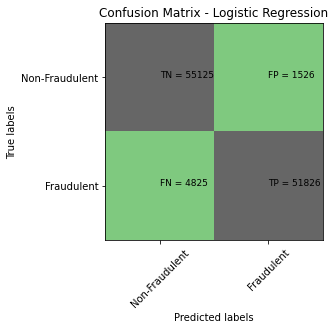

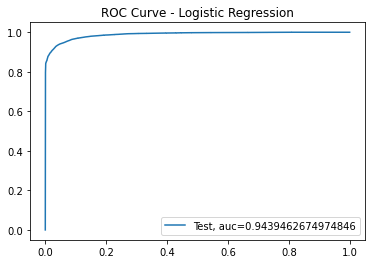

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
pred1 = lr_model.predict(X_test)
prob1 = lr_model.predict_proba(X_test)
print_results1("Logistic Regression", Y_test, pred1,prob1[:,-1])

In [ ]:
evaluation_df1

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.943946,0.971398,0.914829,0.942265


Random Forest Classifier

Random Forest Classifier
--------------------------------------------------------------------------
accuracy score :99.98411325484105
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56651

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



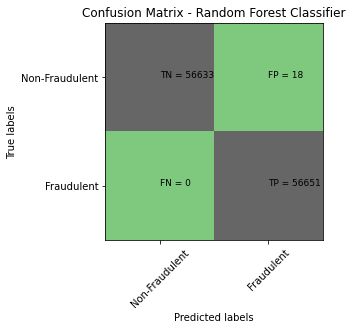

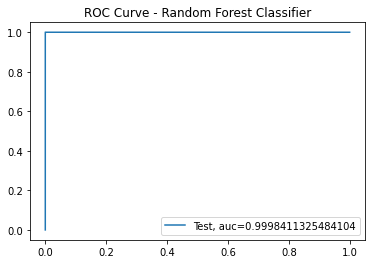

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,Y_train)
pred2 = rfc_model.predict(X_test)
prob2 = rfc_model.predict_proba(X_test)
print_results1("Random Forest Classifier", Y_test, pred2,prob2[:,-1])

In [ ]:
evaluation_df1

,Model,accuracy score,Precision,Recall,f1_score
0,Logistic Regression,0.943946,0.971398,0.914829,0.942265
1,Random Forest Classifier,0.999841,0.999682,1.000000,0.999841


KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=16)
knn.fit(X_train,Y_train)
pred4 = knn.predict(X_test)
prob4 = knn.predict_proba(X_test)
print_results1("KNN Classifier", Y_test, pred4,prob4[:,-1])